# --- โหลดข้อมูล --- ไฟล์ xlsx
baseline_df = pd.read_excel('C:/Users/aungl/Downloads/Network Analysis/Game Ready Driver/PC1 Baseline Test (Game Ready Driver).xlsx')

# --- โหลดข้อมูล --- ไฟล์ csv
baseline_df = pd.pd.read_csv('C:/Users/aungl/Downloads/Network Analysis/Game Ready Driver/PC1 Baseline Test (Game Ready Driver).csv')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- โหลดข้อมูลทั้ง 6 ไฟล์ ---

# Game Ready Driver
gr_baseline = pd.read_excel('C:/Users/aungl/Downloads/Network Analysis/Game Ready Driver/PC1 Baseline Test (Game Ready Driver).xlsx')
gr_standard = pd.read_excel('C:/Users/aungl/Downloads/Network Analysis/Game Ready Driver/PC1 Standard Test (Game Ready Driver).xlsx')
gr_stress = pd.read_excel('C:/Users/aungl/Downloads/Network Analysis/Game Ready Driver/PC1 Stress Test (Game Ready Driver).xlsx')

# --- โหลดข้อมูล Studio Driver ---
studio_baseline = pd.read_excel('C:/Users/aungl/Downloads/Network Analysis/Studio Driver/PC1 Baseline Test (Studio Driver).xlsx')
studio_standard = pd.read_excel('C:/Users/aungl/Downloads/Network Analysis/Studio Driver/PC1 Standard Test (Studio Driver).xlsx')
studio_stress = pd.read_excel('C:/Users/aungl/Downloads/Network Analysis/Studio Driver/PC1 Stress Test (Studio Driver).xlsx')

C:\Users\aungl\AppData\Local\Temp\ipykernel_17700\492966865.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = combined_df.groupby(['Load_Level', 'Driver_Type'])[metrics].mean().reset_index()


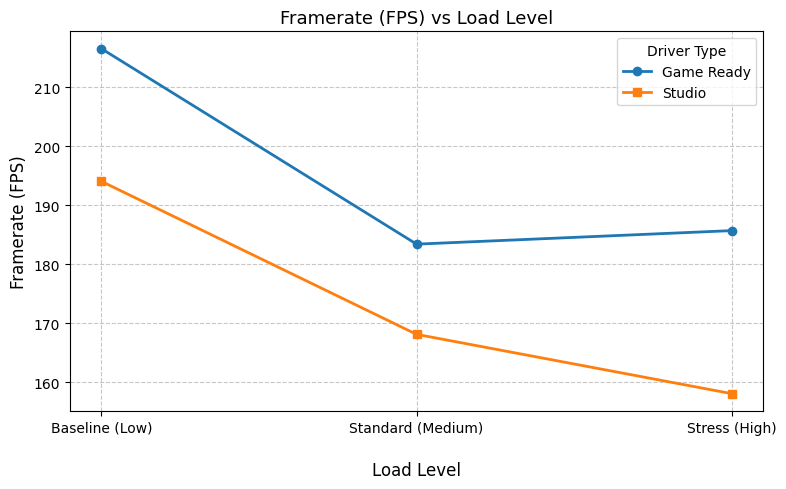

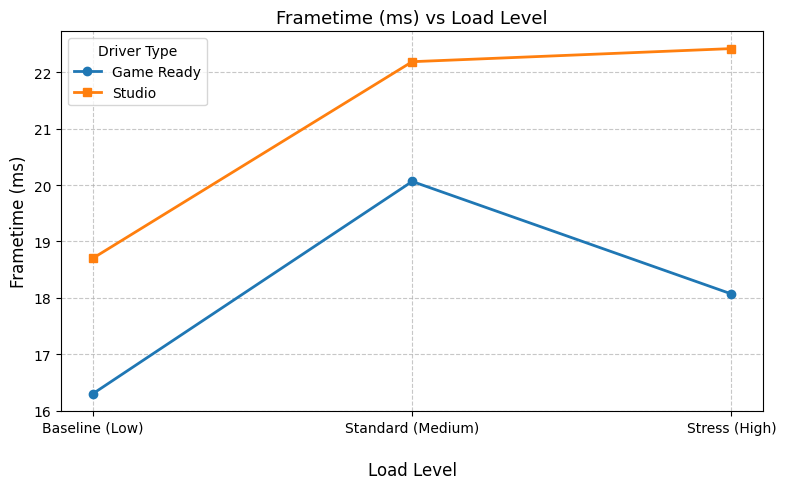

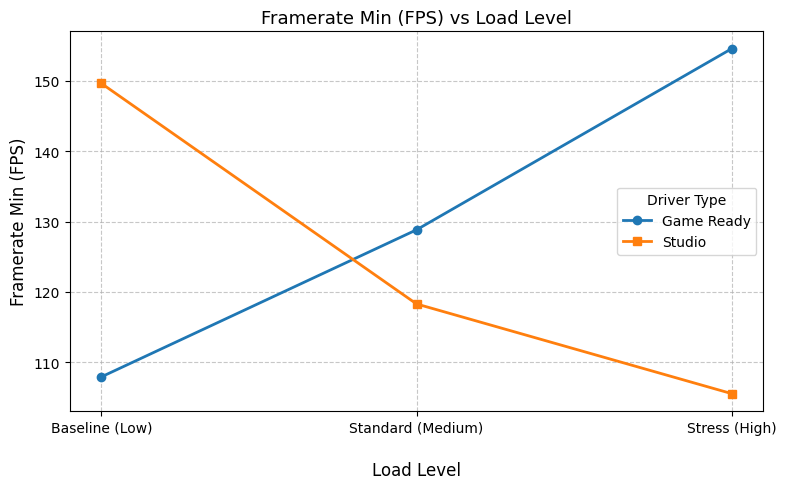

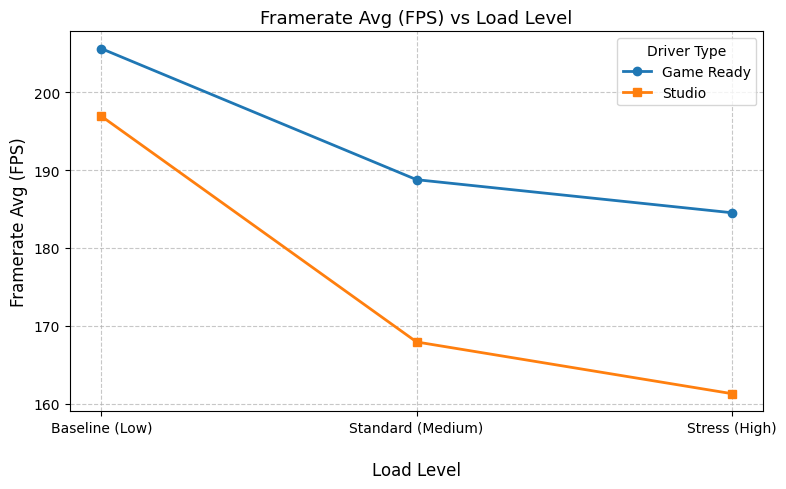

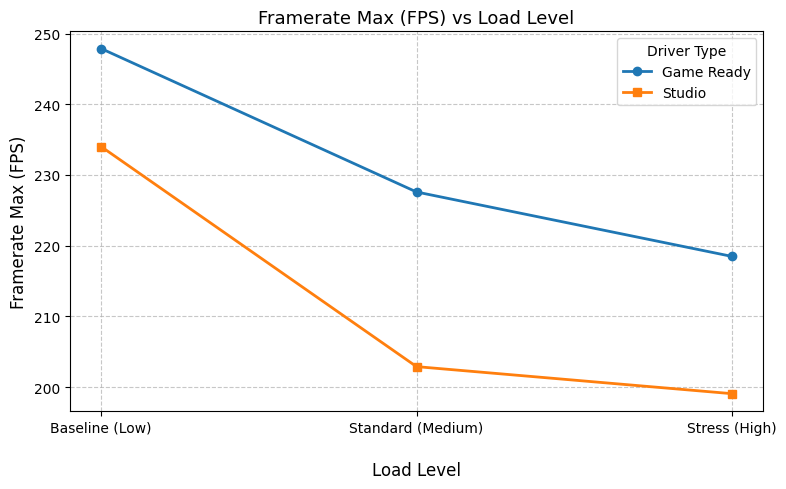

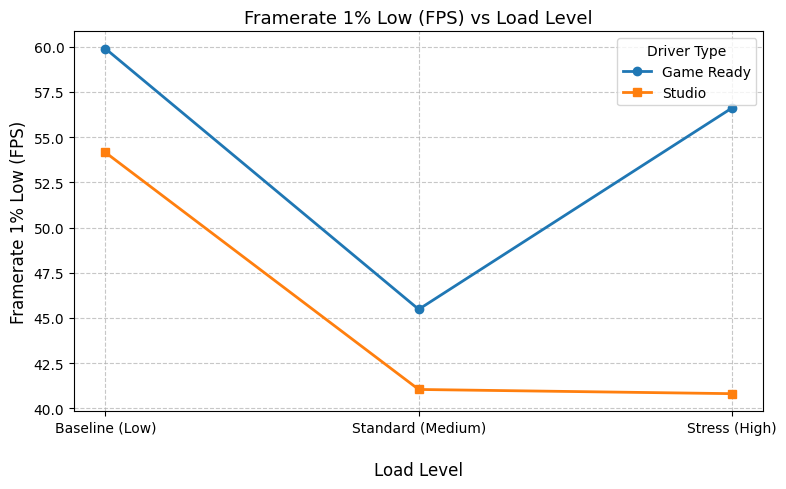

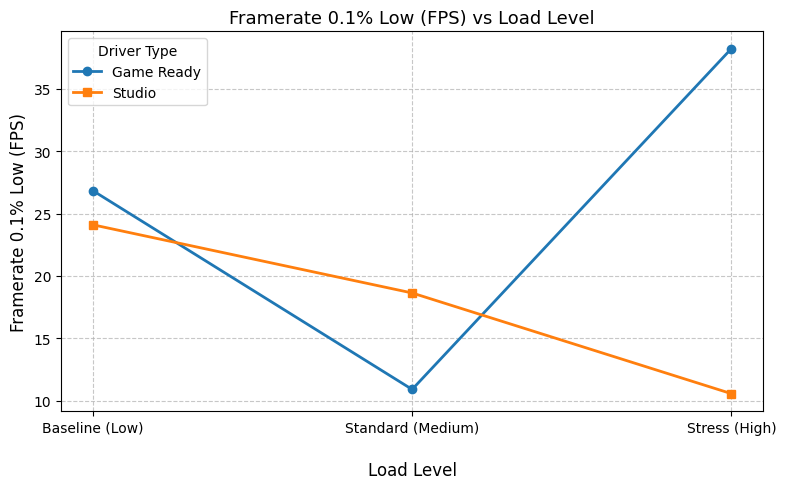

In [ ]:
# --- เพิ่ม metadata ---
def add_metadata(df, load_name, driver_type):
    df = df.copy()
    df['Load_Level'] = load_name
    df['Driver_Type'] = driver_type
    return df

gr_baseline = add_metadata(gr_baseline, 'Baseline (Low)', 'Game Ready')
gr_standard = add_metadata(gr_standard, 'Standard (Medium)', 'Game Ready')
gr_stress = add_metadata(gr_stress, 'Stress (High)', 'Game Ready')

studio_baseline = add_metadata(studio_baseline, 'Baseline (Low)', 'Studio')
studio_standard = add_metadata(studio_standard, 'Standard (Medium)', 'Studio')
studio_stress = add_metadata(studio_stress, 'Stress (High)', 'Studio')

# --- รวมข้อมูล ---
combined_df = pd.concat([
    gr_baseline, gr_standard, gr_stress,
    studio_baseline, studio_standard, studio_stress
], ignore_index=True)

# --- กำหนดลำดับ Load Level ---
load_order = ['Baseline (Low)', 'Standard (Medium)', 'Stress (High)']
combined_df['Load_Level'] = pd.Categorical(combined_df['Load_Level'], categories=load_order, ordered=True)

# --- เมตริกที่ต้องการพล็อต ---
metrics = [
    'Framerate (FPS)',
    'Frametime (ms)',
    'Framerate Min (FPS)',
    'Framerate Avg (FPS)',
    'Framerate Max (FPS)',
    'Framerate 1% Low (FPS)',
    'Framerate 0.1% Low (FPS)'
]

# --- คำนวณค่าเฉลี่ยตาม Load + Driver ---
summary = combined_df.groupby(['Load_Level', 'Driver_Type'])[metrics].mean().reset_index()
summary = summary.sort_values(['Load_Level']).reset_index(drop=True)

# --- สีและ marker ---
driver_colors = {'Game Ready': 'tab:blue', 'Studio': 'tab:orange'}
driver_markers = {'Game Ready': 'o', 'Studio': 's'}

# --- พล็อตกราฟแยกแต่ละเมตริก ---
for metric in metrics:
    plt.figure(figsize=(8, 5))
    
    for driver in ['Game Ready', 'Studio']:
        subset = summary[summary['Driver_Type'] == driver]
        plt.plot(
            subset['Load_Level'],
            subset[metric],
            marker=driver_markers[driver],
            linestyle='-',
            color=driver_colors[driver],
            label=driver,
            linewidth=2,
            markersize=6
        )
    
    # ตั้งชื่อแกน Y ให้ตรงกับชื่อ metric
    plt.ylabel(metric, fontsize=12)  # ← ตรงนี้คือการปรับให้ตรงกับ metric
    
    plt.title(f'{metric} vs Load Level', fontsize=13)
    plt.xlabel('\nLoad Level', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Driver Type')
    plt.tight_layout()
    plt.show()